# Linear Model Regressions

## Packages

In [1]:
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from collections import Counter
import random



import matplotlib.pyplot as plt



## Import Data

In [2]:
df = pd.read_csv('train_df.csv')
df.head()

,age,Pedu,traveltime,studytime,failures,famrel,gooutAlc,health,sex,addressInternet,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,G3
0,1.021751,-0.940091,-0.642435,-1.233786,0.895343,-1.053136,1.570863,1.039751,1,1,...,1,0,0,0,1,0,0,0,0,8
1,0.238078,-0.940091,-0.642435,-0.042232,-0.449374,0.062115,1.570863,0.320484,1,1,...,0,0,0,0,0,0,0,1,0,13
2,0.238078,-0.940091,0.791247,-0.042232,-0.449374,0.062115,0.657033,1.039751,0,1,...,1,0,0,0,0,0,1,0,0,12
3,-0.545595,1.024650,-0.642435,-1.233786,-0.449374,-1.053136,-1.170628,1.039751,1,1,...,0,1,0,0,0,1,1,0,0,0
4,1.805423,-1.922461,-0.642435,-0.042232,0.895343,0.062115,-0.256798,-0.398784,0,1,...,0,0,0,0,0,0,0,0,1,10


In [3]:
X = df.drop(['G3'], axis = 1)
y = df[['G3']]

## Feature selection via backward elimination using p-value

In [4]:
def majority_vote_with_random_tie_breaking(strings):
    counts = Counter(strings)
    
    max_count = max(counts.values())
    majority_strings = [string for string, count in counts.items() if count == max_count]

    result = random.choice(majority_strings)
    
    return result

In [5]:

kf = KFold(n_splits=8, shuffle=False, random_state=None)

features = list(X.columns)

rsquared_history = []

for i in range(26):
    print(f'\t Current features: {features}')
    # Create the correct formula
    formula = 'G3 ~ '
    for feature in features:
        formula += str(feature)+' + '    
    formula = formula[:-3]
    
    rsquared_values = []
    largest_pvalue_features = []
    
    for train_index, test_index in kf.split(df):
        train_data = df.iloc[train_index]
        test_data = df.iloc[test_index]

        model = sm.OLS.from_formula(formula, data=train_data).fit()
        
        y_test_pred = model.predict(test_data)
        y_test_actual = test_data['G3']
        ss_total = ((y_test_actual - y_test_actual.mean())**2).sum()
        ss_residual = ((y_test_actual - y_test_pred)**2).sum()
        rsquared = 1 - (ss_residual / ss_total)

        rsquared_values.append(rsquared)
        largest_pvalue_features.append(model.pvalues.drop('Intercept').idxmax())
        
    rsquared = sum(rsquared_values)/8
    largest_pvalue_feature = majority_vote_with_random_tie_breaking(largest_pvalue_features)

    print(f'Model r2: {rsquared}, removed feature: {largest_pvalue_feature}')
    
    features.remove(largest_pvalue_feature)
    
    rsquared_history.append(rsquared)


	 Current features: ['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'romantic', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation']
Model r2: 0.018033169096096383, removed feature: Mjob_at_home
	 Current features: ['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation']
Model r2: 0.028874079618193202, removed feature: reason_reputation
	 Current features: ['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 

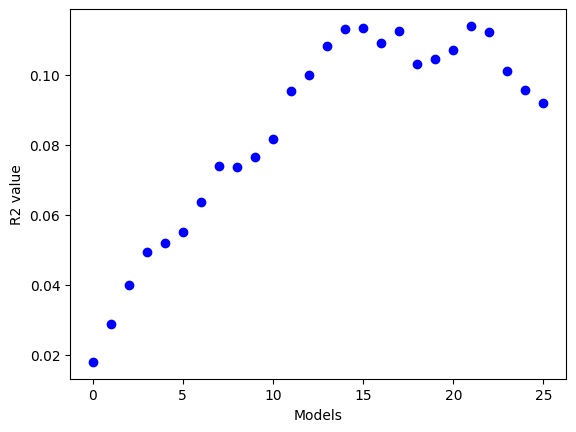

In [6]:
#plt.plot(rsquared_history)
plt.scatter(range(len(rsquared_history)), rsquared_history, marker='o', color='blue')


# Aggiunta di etichette agli assi
plt.xlabel('Models')
plt.ylabel('R2 value')


# Visualizzazione del grafico
plt.show()

In [7]:
features = ['Pedu', 'studytime', 'failures', 'gooutAlc', 'sex', 'addressInternet', 'famsize', 'schoolsup', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher']

formula = 'G3 ~ '
for feature in features:
    formula += str(feature)+' + '    
formula = formula[:-3]

model = sm.OLS.from_formula(formula, data=df).fit()
model.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     8.153
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.66e-14
Time:                        11:55:22   Log-Likelihood:                -891.00
No. Observations:                 317   AIC:                             1810.
Df Residuals:                     303   BIC:                             1863.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.8889      1.275      6.970      0.000       6.379      11.398
Pedu                0.5697      0.290      1.964      0.050      -0.001       1.140
studytime           0.5042      0.254      1.986      0.048       0.005       1.004
failures           -1.3959      0.278     -5.030      0.000      -1.942      -0.850
gooutAlc           -0.4383      0.235     -1.862      0.064      -0.901       0.025
sex                 1.0354      0.507      2.044      0.042       0.039       2.032
addressInternet     1.0168      0.519      1.960      0.051      -0.004       2.038
famsize            -0.8687      0.510     -1.703      0.089      -1.872       0.135
schoolsup          -1.5265      0.729     -2.094      0.037      -2.961      -0.092
higher              1.3007      1.085      1.199      0.232      -0.834       3.436
romantic           -1.2116      0.502     -2.414      0.016      -2.199      -0.224
Mjob_health         1.5158      0.993      1.527      0.128      -0.438       3.470
Mjob_services       1.2438      0.589      2.110      0.036       0.084       2.404
Mjob_teacher       -1.1824      0.798     -1.482      0.139      -2.752       0.388
==============================================================================
Omnibus:                       35.028   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.182
Skew:                          -0.817   Prob(JB):                     2.55e-10
Kurtosis:                       3.822   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have already trained a linear regression model and obtained y_true, y_pred

# Calculate residuals
residuals = y_true - y_pred

# Diagnostic plots using statsmodels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Residuals vs. Fitted Values Plot
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0, 0])
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Residuals vs. Fitted Values')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Residuals')

# Residuals Distribution Plot
sns.histplot(residuals, bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axes[1, 1])
axes[1, 1].set_title('Autocorrelation of Residuals')

plt.tight_layout()
plt.show()

## Regularization

In [8]:

model = LinearRegression()

mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')

print(f"Linear Regression: \tMSE: {mse.mean()} \tR2: {r2.mean()}")


Linear Regression: 	MSE: -18.087597631273965 	R2: 0.11322018338269296


In [9]:
for alpha in [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 10, 100, 200, 500, 1000]:

    model = Ridge(alpha=alpha)
    mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
    r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')
    print(f"Ridge Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

# best value is 100


Ridge Regression 0.01: 	MSE: -18.087117045608313 	R2: 0.1132502949739115
Ridge Regression 0.02: 	MSE: -18.086637344808324 	R2: 0.11328036040081474
Ridge Regression 0.05: 	MSE: -18.085203529641483 	R2: 0.11337028078942776
Ridge Regression 0.1: 	MSE: -18.08283133119602 	R2: 0.11351923496983006
Ridge Regression 0.5: 	MSE: -18.06461090172617 	R2: 0.11467127548681195
Ridge Regression 1: 	MSE: -18.043591347036724 	R2: 0.11601918039904684
Ridge Regression 2: 	MSE: -18.006624958878025 	R2: 0.11844693470968046
Ridge Regression 10: 	MSE: -17.85215469958127 	R2: 0.1301875039182286
Ridge Regression 100: 	MSE: -18.170688526420857 	R2: 0.1329238322335178
Ridge Regression 200: 	MSE: -18.63982938220242 	R2: 0.11691935335679235
Ridge Regression 500: 	MSE: -19.567766266690995 	R2: 0.07926658270815543
Ridge Regression 1000: 	MSE: -20.351770518462317 	R2: 0.04495718813595395


In [10]:
for alpha in [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 10, 100, 200, 500, 1000]:

    model = Lasso(alpha=alpha)
    mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
    r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')
    print(f"Lasso Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

# best value is 0.02

Lasso Regression 0.01: 	MSE: -18.0955563152692 	R2: 0.114360203715619
Lasso Regression 0.02: 	MSE: -18.12084172475374 	R2: 0.11462574014657302
Lasso Regression 0.05: 	MSE: -18.270402598480885 	R2: 0.11153069990242914
Lasso Regression 0.1: 	MSE: -18.57529192965181 	R2: 0.10273301944107371
Lasso Regression 0.5: 	MSE: -19.499778517114386 	R2: 0.07448754005803356
Lasso Regression 1: 	MSE: -20.292569726832596 	R2: 0.04568386624011972
Lasso Regression 2: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 10: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 100: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 200: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 500: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 1000: 	MSE: -22.020576274196017 	R2: -0.03114964777584156


In [11]:
model = Lasso(alpha=0.02)
model.fit(X, y)
model.coef_

array([-0.29553538,  0.43371421, -0.09898889,  0.46558743, -1.385758  ,
        0.26214492, -0.38208539, -0.19807218,  0.85492565,  0.77947434,
       -0.86847636,  0.51793064, -1.516625  ,  0.16464243, -0.59320881,
        0.6069646 , -1.0571554 , -0.29558312,  1.30259091,  1.12725536,
       -0.99759212,  0.3246138 , -0.        , -0.08862717,  0.88662754,
       -0.20355869, -0.18136185, -0.        ])

In [12]:
for alpha in [50, 75, 100, 125, 150, 175, 200]:
    for l1_ratio in [0.0005, 0.001, 0.005, 0.01]:

        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
        r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')
        print(f"ElasticNet Regression {alpha} \t{l1_ratio}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")


ElasticNet Regression 50 	0.0005: 	MSE: -21.847900594543002 	R2: -0.02315216574503566
ElasticNet Regression 50 	0.001: 	MSE: -21.853304554870146 	R2: -0.023400449229186604
ElasticNet Regression 50 	0.005: 	MSE: -21.892523969280006 	R2: -0.025200303829682164
ElasticNet Regression 50 	0.01: 	MSE: -21.930960085176583 	R2: -0.026973953678276097
ElasticNet Regression 75 	0.0005: 	MSE: -21.90589587195459 	R2: -0.02583525589958137
ElasticNet Regression 75 	0.001: 	MSE: -21.91141854502515 	R2: -0.02608921103687427
ElasticNet Regression 75 	0.005: 	MSE: -21.948354836130193 	R2: -0.02778778334592008
ElasticNet Regression 75 	0.01: 	MSE: -21.978575200036108 	R2: -0.029196811084533397
ElasticNet Regression 100 	0.0005: 	MSE: -21.935447342917413 	R2: -0.02720330759374749
ElasticNet Regression 100 	0.001: 	MSE: -21.94099669554612 	R2: -0.027458695451516038
ElasticNet Regression 100 	0.005: 	MSE: -21.975269325830297 	R2: -0.029037354926492412
ElasticNet Regression 100 	0.01: 	MSE: -22.000027696318813

## PCA components

In [13]:
import numpy as np

from sklearn.decomposition import PCA

### Full dataset

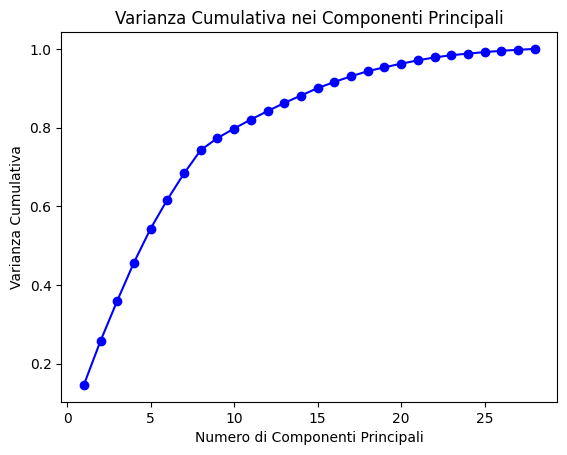

In [14]:
pca = PCA()
pca_result = pca.fit_transform(X)

# Creazione del grafico con le varianze cumulative
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

pca_result.shape
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Varianza Cumulativa nei Componenti Principali')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa')
plt.show()

In [28]:
X_pca = pca_result[:,:7]

In [29]:

model = LinearRegression()

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Linear Regression: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Linear Regression: 	MSE: -19.35710113500891 	R2: 0.06883574776322338


In [30]:
model = Ridge(alpha=100)

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Ridge Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Ridge Regression 200: 	MSE: -19.18059602833271 	R2: 0.08471665208980707


### Selected features

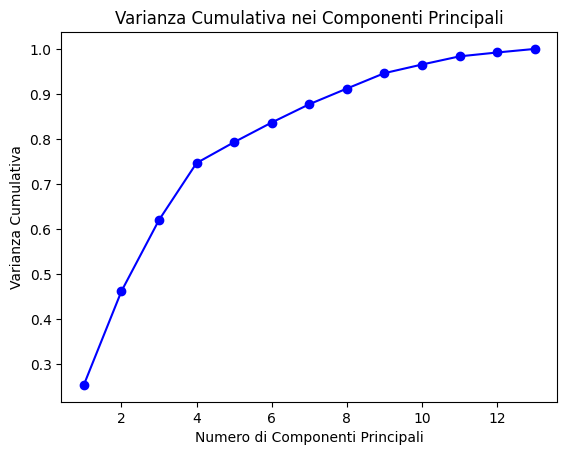

In [32]:
pca = PCA()
pca_result = pca.fit_transform(X[features])

# Creazione del grafico con le varianze cumulative
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

pca_result.shape
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Varianza Cumulativa nei Componenti Principali')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa')
plt.show()

In [33]:
X_pca = pca_result[:,:3]

In [34]:

model = LinearRegression()

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Linear Regression: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Linear Regression: 	MSE: -19.211104796378727 	R2: 0.08747178615881984


In [35]:
model = Ridge(alpha=100)

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Ridge Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Ridge Regression 200: 	MSE: -19.218921244074416 	R2: 0.0919755916471174
